c:\Users\l\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Libraries imported successfully!
✅ Dataset downloaded to: C:\Users\l\.cache\kagglehub\datasets\yashpaloswal\ann-car-sales-price-prediction\versions\1
📁 Found CSV file: C:\Users\l\.cache\kagglehub\datasets\yashpaloswal\ann-car-sales-price-prediction\versions\1\car_purchasing.csv
   Trying encoding: utf-8...
   ❌ Failed with utf-8
   Trying encoding: latin-1...
✅ Successfully loaded with encoding: latin-1
✅ Loaded 500 records with 9 columns

📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 

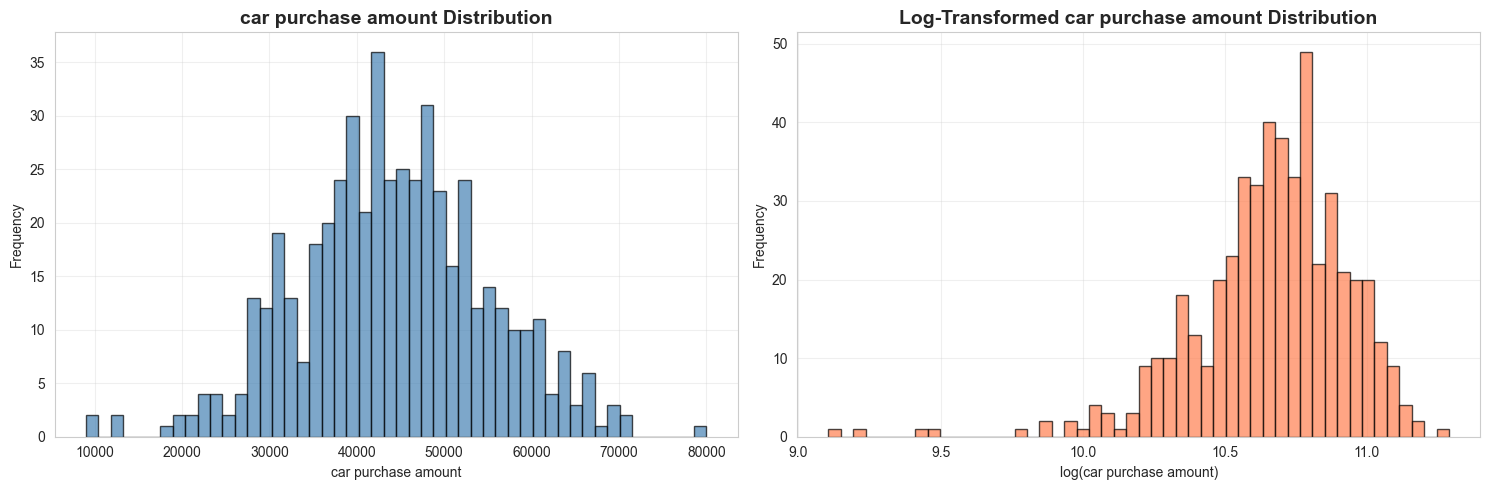

✅ Price distribution plots saved!


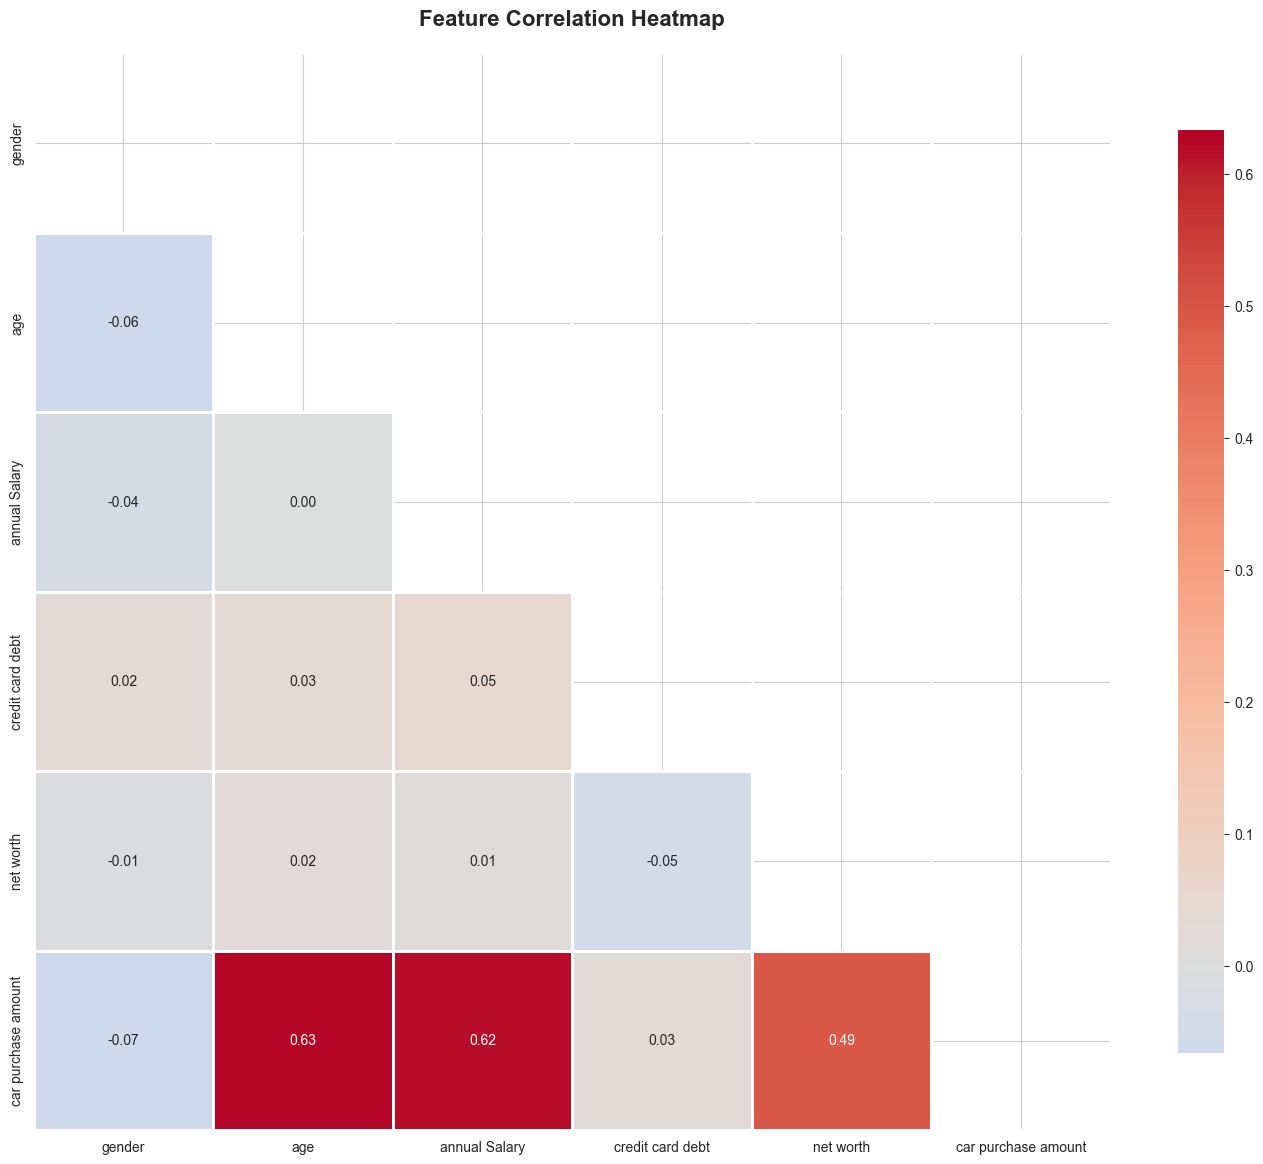


🎯 Top Features Correlated with car purchase amount:
car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
gender                -0.066408
Name: car purchase amount, dtype: float64

✅ Correlation heatmap saved!

📋 Found 3 categorical features:
   - customer name: 498 unique values
   - customer e-mail: 500 unique values
   - country: 211 unique values


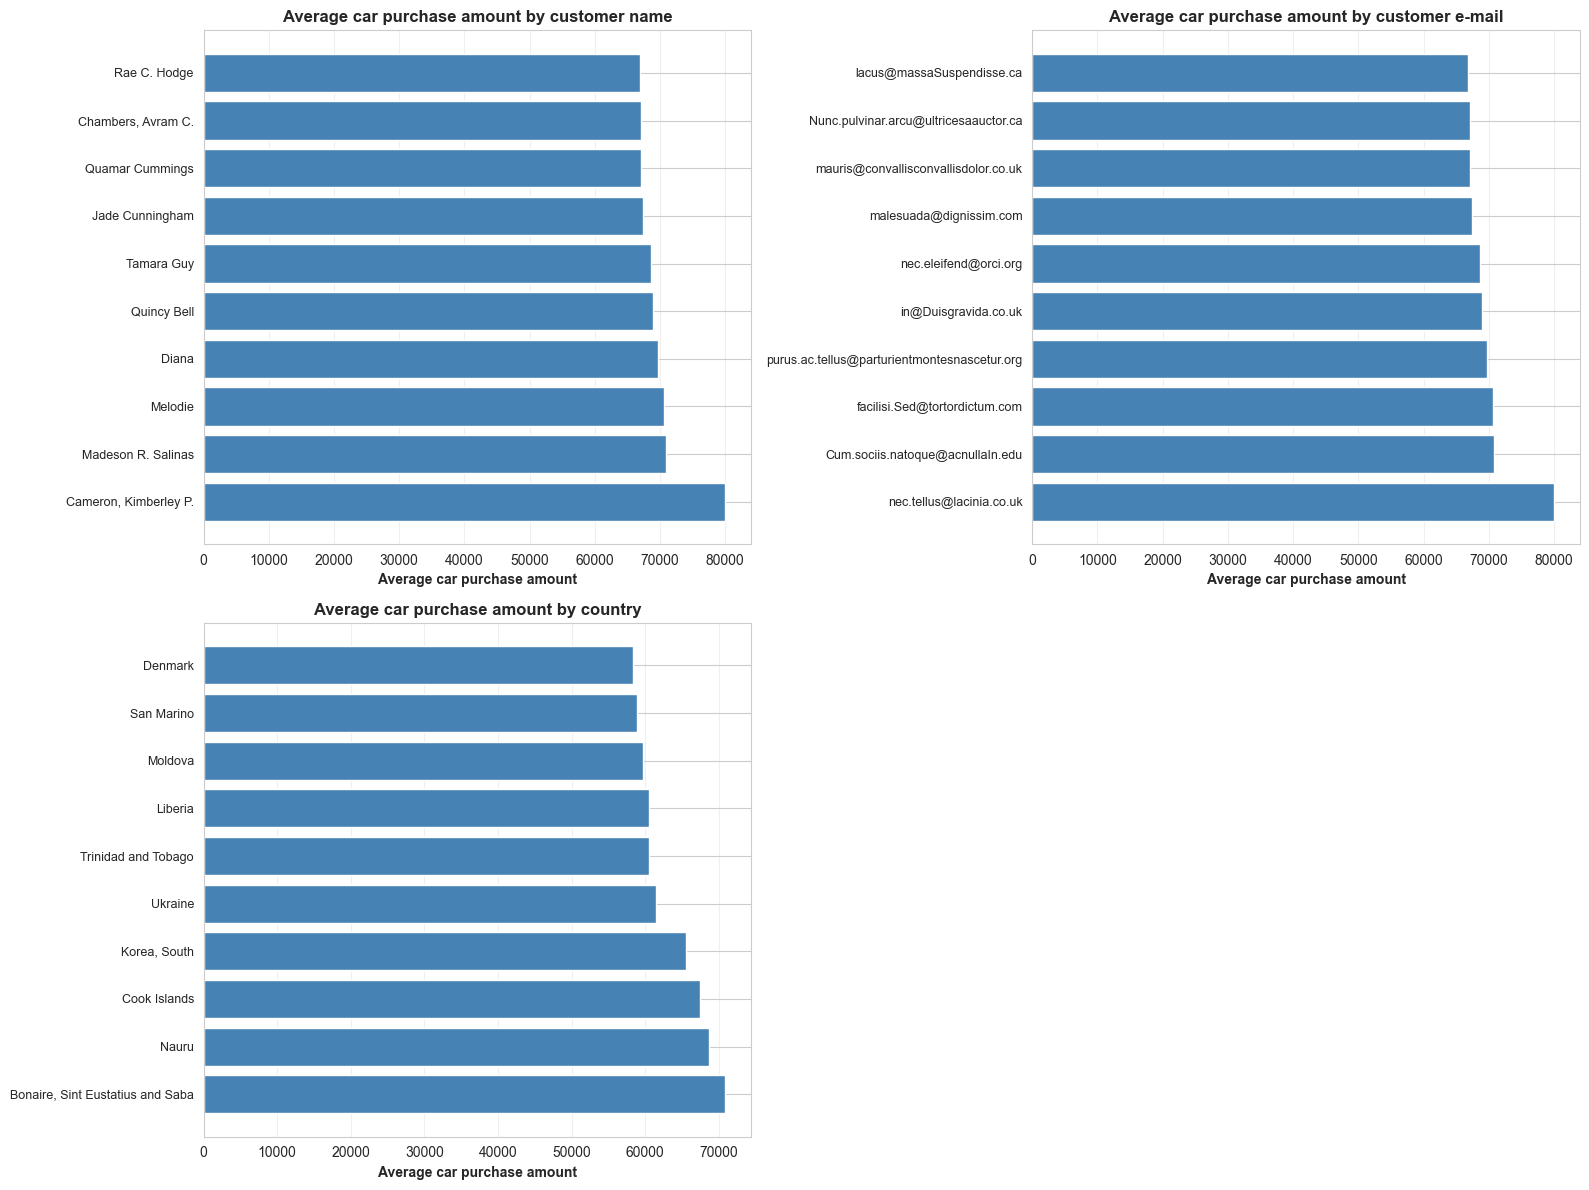


✅ Categorical analysis plots saved!


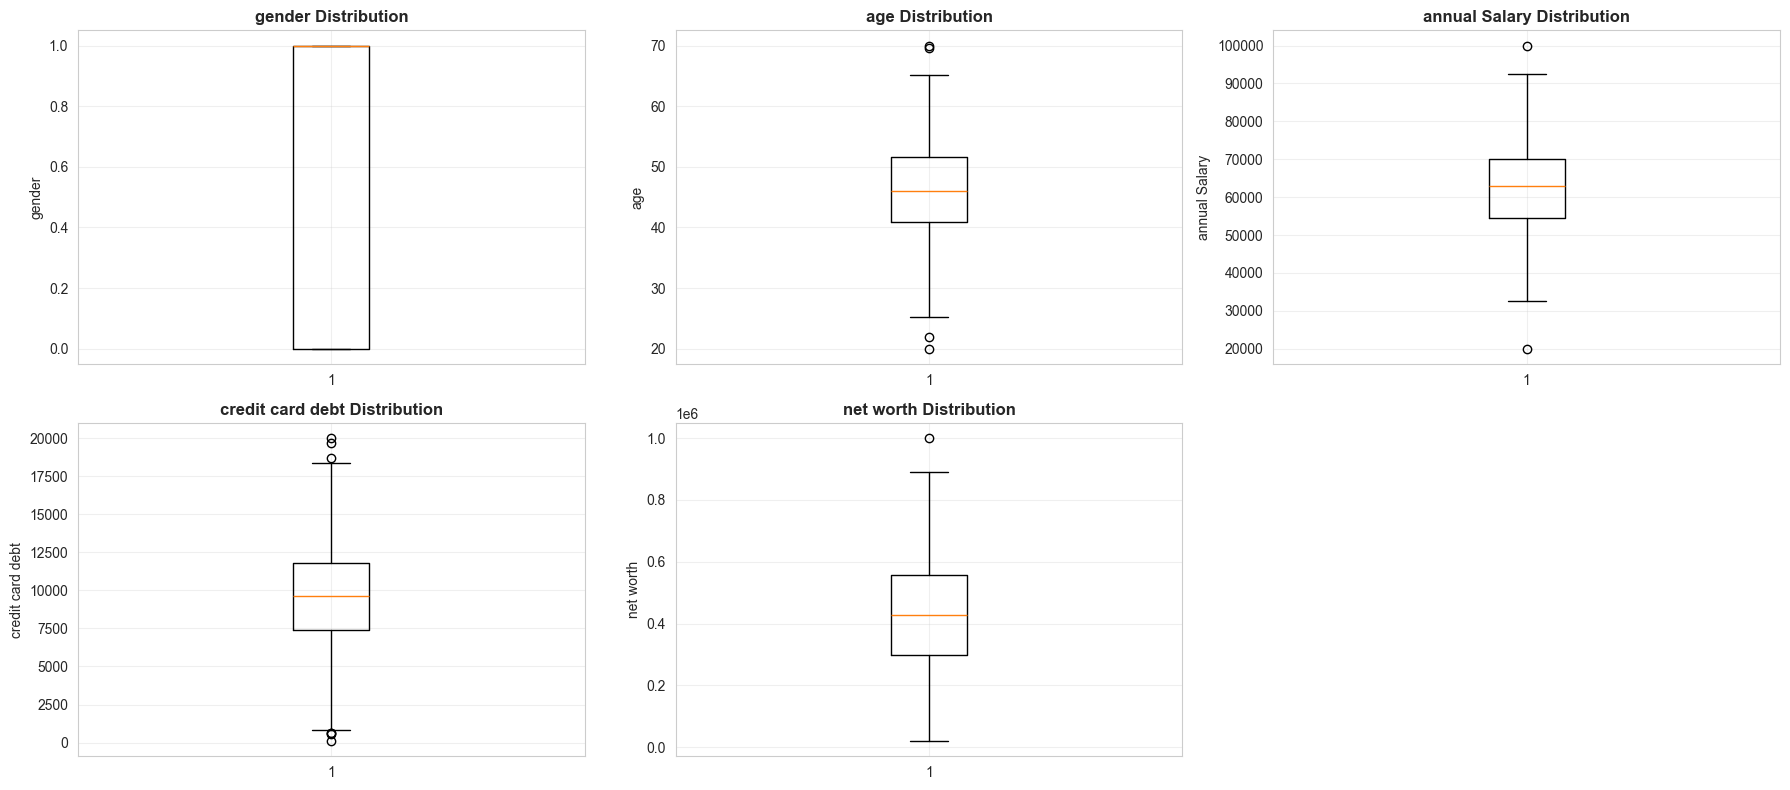


✅ Outlier detection plots saved!

📊 EXPLORATORY DATA ANALYSIS SUMMARY

✅ Total Records: 500
✅ Total Features: 9
✅ Numeric Features: 6
✅ Categorical Features: 3

💰 car purchase amount Statistics:
   - Mean: $44,209.80
   - Median: $43,997.78
   - Min: $9,000.00
   - Max: $80,000.00
   - Std Dev: $10,773.18
   - 25th Percentile: $37,629.90
   - 75th Percentile: $51,254.71

✅ EDA COMPLETE - Ready for modeling!


In [1]:
# ===== CELL 1: Setup =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

# Add src to path for imports
sys.path.append('../src')
from data_preprocessing import CarSalesDataProcessor

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")

# ===== CELL 2: Download Data =====
# Download dataset
try:
    path = kagglehub.dataset_download("yashpaloswal/ann-car-sales-price-prediction")
    print(f"✅ Dataset downloaded to: {path}")
except Exception as e:
    print(f"❌ Error downloading dataset: {e}")
    # If download fails, you can manually specify the path
    # path = "path/to/your/downloaded/dataset"

# ===== CELL 3: Load and Explore =====
# Initialize processor
processor = CarSalesDataProcessor(path)
df = processor.load_data()
processor.explore_data()

# ===== CELL 4: Clean Data =====
df_clean = processor.clean_data()

# Save processed data
output_path = Path('../data/processed/car_sales_clean.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)
processor.save_processed_data(output_path)

print("\n✅ Data cleaning complete!")
print(f"📊 Clean dataset shape: {df_clean.shape}")

# ===== CELL 5: Identify Price Column =====
# Find the price column dynamically
price_cols = [col for col in df_clean.columns if 'price' in col.lower()]
if price_cols:
    price_col = price_cols[0]
else:
    # If no price column, use last column
    price_col = df_clean.columns[-1]
    print(f"⚠️ No 'price' column found. Using '{price_col}' as target.")

print(f"🎯 Target Column: '{price_col}'")
print(f"   Range: ${df_clean[price_col].min():,.2f} - ${df_clean[price_col].max():,.2f}")
print(f"   Mean: ${df_clean[price_col].mean():,.2f}")

# ===== CELL 6: Distribution Analysis =====
# Create visualizations directory
vis_dir = Path('../visualizations')
vis_dir.mkdir(parents=True, exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Price distribution
axes[0].hist(df_clean[price_col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title(f'{price_col} Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel(price_col)
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Log-transformed price
axes[1].hist(np.log1p(df_clean[price_col]), bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_title(f'Log-Transformed {price_col} Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'log({price_col})')
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Price distribution plots saved!")

# ===== CELL 7: Correlation Heatmap =====
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Print top correlations with price
if price_col in corr_matrix.columns:
    price_corr = corr_matrix[price_col].sort_values(ascending=False)
    print(f"\n🎯 Top Features Correlated with {price_col}:")
    print(price_corr.head(10))
else:
    print(f"⚠️ '{price_col}' not found in numeric columns")

print("\n✅ Correlation heatmap saved!")

# ===== CELL 8: Categorical Analysis =====
# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    print(f"\n📋 Found {len(categorical_cols)} categorical features:")
    for col in categorical_cols:
        print(f"   - {col}: {df_clean[col].nunique()} unique values")
    
    # Plot first 4 categorical features
    num_plots = min(4, len(categorical_cols))
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for idx, col in enumerate(categorical_cols[:4]):
        # Average price by category (top 10)
        avg_price = df_clean.groupby(col)[price_col].mean().sort_values(ascending=False).head(10)
        
        axes[idx].barh(range(len(avg_price)), avg_price.values, color='steelblue')
        axes[idx].set_yticks(range(len(avg_price)))
        axes[idx].set_yticklabels(avg_price.index, fontsize=9)
        axes[idx].set_xlabel(f'Average {price_col}', fontweight='bold')
        axes[idx].set_title(f'Average {price_col} by {col}', fontweight='bold', fontsize=12)
        axes[idx].grid(alpha=0.3, axis='x')
    
    # Hide unused subplots
    for idx in range(num_plots, 4):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../visualizations/categorical_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Categorical analysis plots saved!")
else:
    print("\n⚠️ No categorical features found in dataset")

# ===== CELL 9: Outlier Detection =====
# Box plots for key numeric features
numeric_cols = numeric_df.columns.tolist()
key_features = [col for col in numeric_cols if col != price_col][:6]

if len(key_features) > 0:
    num_plots = min(6, len(key_features))
    rows = (num_plots + 2) // 3  # Calculate rows needed
    
    fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
    axes = axes.ravel() if num_plots > 1 else [axes]
    
    for idx, col in enumerate(key_features):
        axes[idx].boxplot(df_clean[col].dropna(), vert=True)
        axes[idx].set_title(f'{col} Distribution', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(alpha=0.3)
    
    # Hide unused subplots
    for idx in range(num_plots, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../visualizations/outlier_detection.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Outlier detection plots saved!")

# ===== CELL 10: Summary Statistics =====
print("\n" + "="*70)
print("📊 EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*70)
print(f"\n✅ Total Records: {len(df_clean):,}")
print(f"✅ Total Features: {len(df_clean.columns)}")
print(f"✅ Numeric Features: {len(numeric_df.columns)}")
print(f"✅ Categorical Features: {len(categorical_cols)}")

print(f"\n💰 {price_col} Statistics:")
print(f"   - Mean: ${df_clean[price_col].mean():,.2f}")
print(f"   - Median: ${df_clean[price_col].median():,.2f}")
print(f"   - Min: ${df_clean[price_col].min():,.2f}")
print(f"   - Max: ${df_clean[price_col].max():,.2f}")
print(f"   - Std Dev: ${df_clean[price_col].std():,.2f}")
print(f"   - 25th Percentile: ${df_clean[price_col].quantile(0.25):,.2f}")
print(f"   - 75th Percentile: ${df_clean[price_col].quantile(0.75):,.2f}")

print("\n" + "="*70)
print("✅ EDA COMPLETE - Ready for modeling!")
print("="*70)